In [19]:
# Imports

!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    ConfusionMatrixDisplay
)


In [21]:
# 1. Load the cleaned dataset
df = pd.read_csv('heart_data.csv') 


In [23]:
# 2. Preprocessing
# Encode categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [25]:
# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


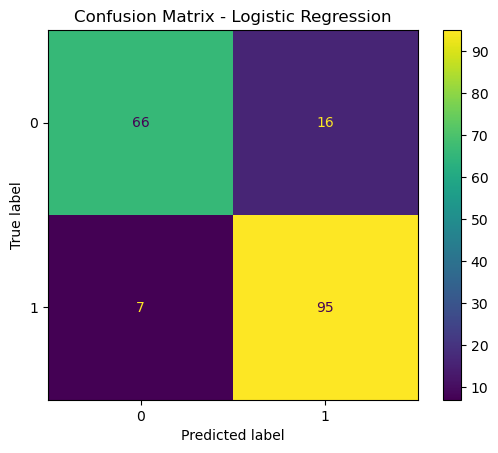

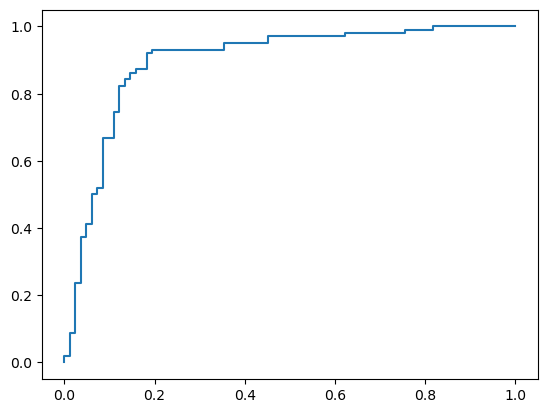

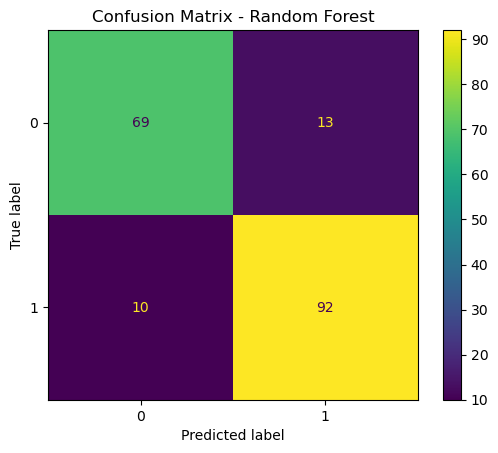

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:29:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


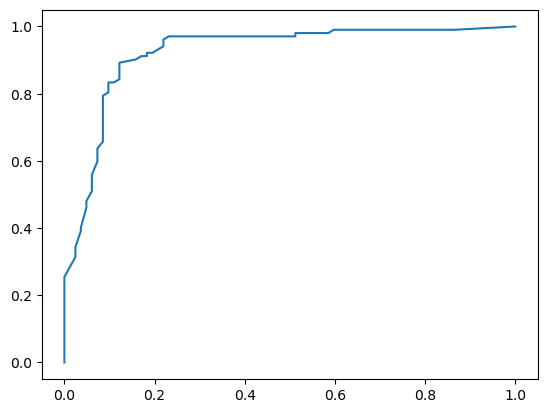

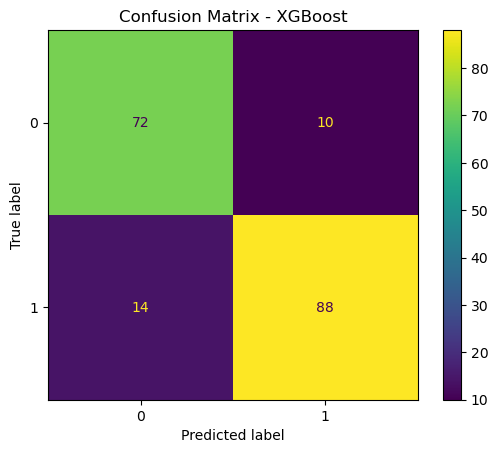

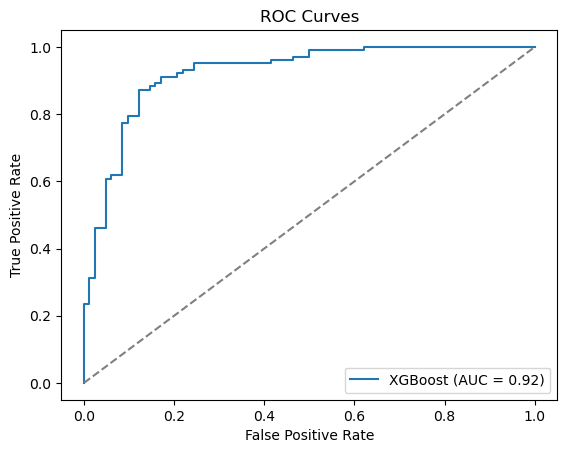

In [27]:
# 4. Model Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [29]:
# 5. Results Summary
results_df = pd.DataFrame(results).T
results_df.sort_values('ROC AUC', ascending=False)


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.875000,0.876190,0.901961,0.888889,0.923661
XGBoost,0.869565,0.897959,0.862745,0.880000,0.923003
Logistic Regression,0.875000,0.855856,0.931373,0.892019,0.895863
